# Clustering K-means
#### UD3. Aprendizaxe non supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

Aunque la mayoría de las aplicaciones de los algoritmos de aprendizaje automático en la actualidad se basan en el aprendizaje supervisado, la gran mayoría de los datos disponibles **no están etiquetados**. Tenemos la entrada $X$, pero no tenemos las etiquetas $y$.

> [Yann LeCun]: "If intelligence was a cake, **Unsupervised Learning** would be the **cake**, **supervised learning** would be the **icing** on the cake, and **reinforcement learning** would be the **cherry** on the cake."

# 1. ¿Qué es el clustering?

El clustering (o agrupación) es la tarea de identificar grupos que contienen objetos similares. Aplicaciones del clustering:
- Búsqueda de similitud de imágenes: agrupación de imágenes disponibles y cuando el usuario proporciona un nuevo elemento, agruparlo con el mismo algoritmo y devolver los principales N elementos centrados.
- Segmentación de imágenes: agrupando píxeles según su color y luego reemplazando los colores de los píxeles con la media de su clúster.
- Análisis de datos: puede ser útil agrupar la instancia y analizar cada una por separado.
- Reducción de dimensionalidad: reemplazando las características con la afinidad de cada instancia a cada clúster.
- Detección de anomalías: es probable que cualquier instancia que tenga poca afinidad con todos los clústeres sea un valor atípico.
- Aprendizaje semisupervisado: si tenemos pocas etiquetas, podemos realizar clustering y propagar las etiquetas disponibles a otras instancias dentro de los clústeres.

Existen diferentes tipos de algoritmos de clustering y no existe una definición universal de lo que es un clúster.
En este notebook trabajaremos el principal algoritmo de clustering que es K-means.

# 2. K-means

El algoritmo $K$-means divide un conjunto de $N$ muestras $X$ en $K$ grupos separados $C$, cada uno descrito por la media $\mu_j$ de las muestras en el grupo. Los puntos medios o centrales se denominan comúnmente **cluster “centroides”**; ten en cuenta que no son, en general, puntos de $X$, aunque viven en el mismo espacio. El algoritmo K-means tiene como objetivo elegir centroides que minimicen la inercia, o el criterio de suma de cuadrados dentro del grupo:

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)$$

La **inertia** (o función de distorsión) representa la suma de los errores cuadráticos. El error viene dado por la diferencia entre las coordenadas de cada punto y las de su centroide. Por lo tanto, calcular la inertia implica tres pasos: determinar el error, elevarlo a cuadrado y, finalmente, sumarlo.

Los centroides de nuestro modelo podrían ser:

- Conocidos: entonces podríamos etiquetar fácilmente el dataset asignando cada registro al grupo con el centroide más cercado. Otra alternativa sería si nos dieran un dataset etiquetado, ya que se podrían ubicar fácilmente todos los centroides calculando la media de las instancias dentro de cada grupo.
- Desconocidos: lo más habitual és que no dispongamos de los centroides ni de las etiquetas. En este caso elegiremos los centroides al azar y refinaremos la búsqueda hasta que no haya cambios. Vamos a verlo!



## 3. ¿Cómo funciona el algoritmo?

El algoritmo de clustering Κ-means suele desconocer los centroides y utiliza un refinamiento iterativo para producir su resultado final. Las entradas del algoritmo son el número de grupos $Κ$ y el conjunto de datos. El conjunto de datos es una colección de características para cada punto de datos. El algoritmo comienza con estimaciones iniciales para los centroides $Κ$, que pueden generarse aleatoriamente o seleccionarse aleatoriamente del conjunto de datos. Luego, el algoritmo itera entre dos pasos:

**1. Paso de asignación de datos**: Cada centroide define uno de los clústeres. En este paso, cada punto de datos se asigna a su centroide más cercano, en función de la distancia euclidiana al cuadrado. Más formalmente, si $c_i$ es la colección de centroides en el conjunto $C$, entonces cada punto de datos $x$ se asigna a un grupo basado en

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$

donde $dist()$ es el estandar ($L_2$) distancia euclídea y $S_i$ el conjunto de asignaciones de puntos de datos para cada i-ésimo centroide de conglomerado.

**2. Paso de actualización del centroide**: en este paso, se vuelven a calcular los centroides. Esto se hace tomando la media de todos los puntos de datos asignados al grupo de ese centroide.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i x_i}$$

El algoritmo itera entre los pasos uno y dos hasta que se cumple un criterio de parada (es decir, ningún punto de datos cambia de grupo, la suma de las distancias se minimiza o se alcanza un número máximo de iteraciones).



## 4. Convergencia e inicialización aleatoria

Este algoritmo está garantizado para converger a un resultado. El resultado puede ser un óptimo local (es decir, no necesariamente el mejor resultado posible), lo que significa que evaluar más de una ejecución del algoritmo con centroides iniciales aleatorios puede dar un mejor resultado.


<div style="text-align:center">
    <img style="ancho:50%" src="img/K-means_convergence.gif">
</div>


## 5. Demo

Vamos a realizar pruebas del algoritmo K-means con la librería `sklearn`:

In [33]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [34]:
# Generación de datos ('clusterizados') con distribución gausiana e isotrópica
# X = samples [n_samples, n_features]
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=[0.5, 0.5, 0.5, 1, 1])

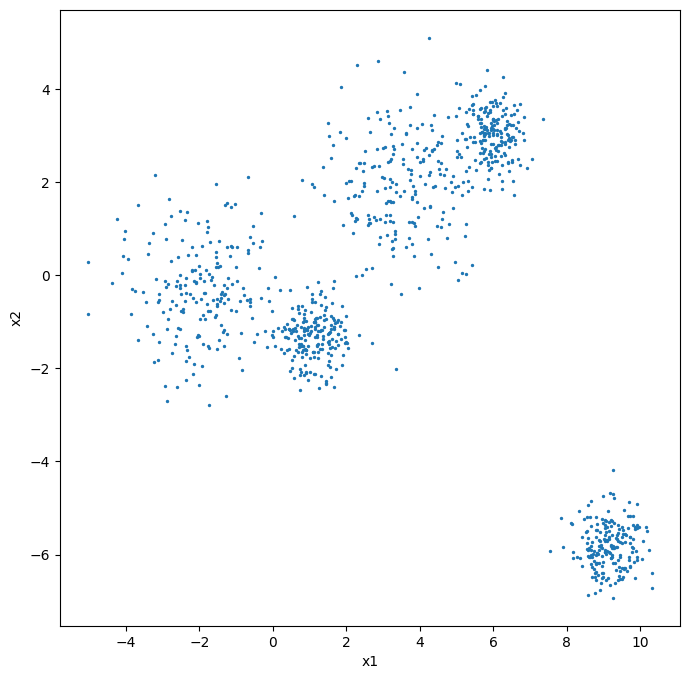

In [35]:
# Visualización
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Ahora entrenaremos el algoritmo de clustering K-means sobre este dataset:

In [36]:
from sklearn.cluster import KMeans

In [37]:
k = 5

In [38]:
# n_init: Número de veces que se ejecuta el algoritmo con diferentes centroides de inicialización || DOS PARAMETROS BASICOS n_cluster y n_init ( n_init = ciantos centroides aleatorios vamos a generar)
kmeans = KMeans(n_clusters=k, n_init='auto')

In [39]:
# Array con la etiqueta del cluster asociado a cada muestra [1, n_samples]
y_pred = kmeans.fit_predict(X)

Ten en cuenta que debe especificar el número de clústeres que se van a encontrar.

In [40]:
# Ver si son el mismo objeto
y_pred is kmeans.labels_

True

podemos ver los 5 centroides que encontró

In [41]:
kmeans.cluster_centers_

array([[-2.07684917, -0.29210966],
       [ 5.86544435,  2.98482553],
       [ 9.14808226, -5.82240992],
       [ 1.06581512, -1.27275671],
       [ 3.31390269,  1.88654367]])

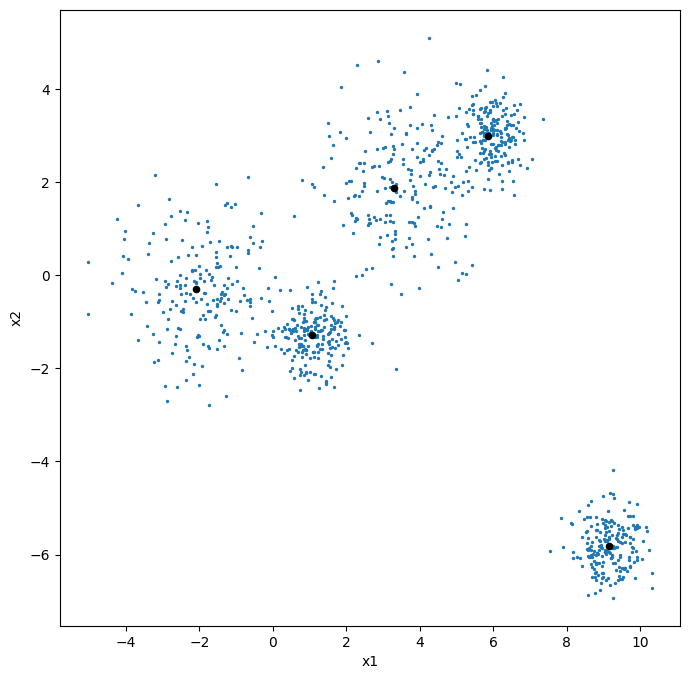

In [42]:
centroids = kmeans.cluster_centers_
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.scatter(centroids[:,0], centroids[:,1], c='k', s=20)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

PREDICCIONES :  saber a que cluster pertenece o está.Podemos predecir fácilmente los clústers a los cuáles pertenecen un grupo de nuevas instancias:

In [43]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [45]:
kmeans.predict(X_new)

array([0, 4, 0, 0], dtype=int32)

// VORONOI // Al trazar los límites de decisión del algoritmo, obtenemos una teselación de [Voronoi](https://es.wikipedia.org/wiki/Pol%C3%ADgonos_de_Thiessen):

In [46]:
# Plotting decision regions
def plot_decision_regions(kmeans, X):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8, 8))
  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
  plt.show()

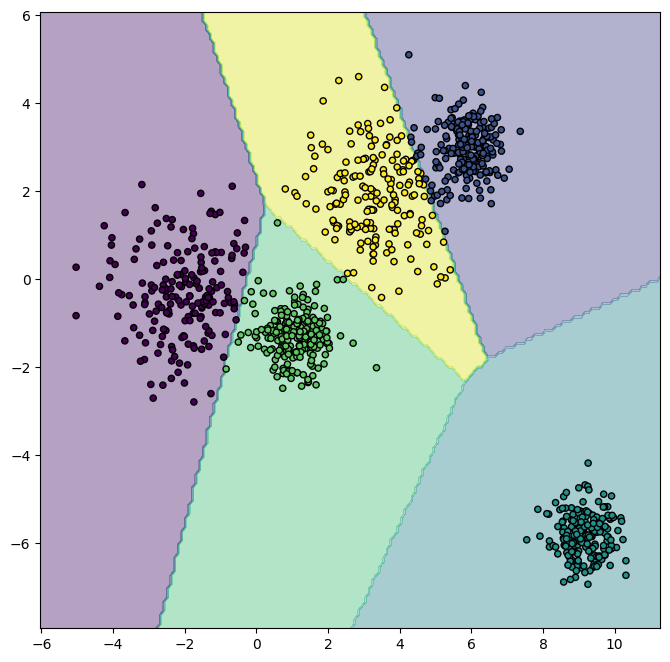

In [47]:
plot_decision_regions(kmeans,X)

La gran mayoría de las instancias se asignaron claramente a su clúster original.

Lo único que le importa a K-means es la distancia entre las instancias y los centroides. En lugar de asignar cada instancia a un clúster (agrupación dura), es mejor dar una puntuación de clúster por instancia (agrupación suave). La puntuación puede ser la distancia entre la instancia y los centroides (esta también puede ser una buena técnica de reducción de dimensionalidad).

En `sklearn`, el método `transform` mide la distancia entre cada instancia y los centroides.

centroides = [
    [3.09306793, 5.94754729, 12.03650721, 3.44193236, 3.31584429],
    [5.57029301, 3.02995918, 9.94932221, 3.80157962, 0.33377723],
    [3.4190925, 8.86545733, 15.01368773, 5.89807617, 6.41132998],
    [2.94076246, 8.8786913, 14.7254341, 5.54657965, 6.34363428]
]

puntos_de_datos = [
    [1.0, 2.0, 3.0, 4.0, 5.0],
    [2.0, 3.0, 4.0, 5.0, 6.0],
    [3.0, 4.0, 5.0, 6.0, 7.0],
    [4.0, 5.0, 6.0, 7.0, 8.0]
]
Ahora, vamos a calcular las distancias euclidianas entre cada punto de datos y cada centroide utilizando comprensión de listas:


# Calculando las distancias euclidianas
distancias = [[((x - y) ** 2) for x, y in zip(punto, centroide)] for punto in puntos_de_datos for centroide in centroides]

# Reshape de la lista de distancias para tener la misma forma que la matriz original
num_puntos = len(puntos_de_datos)
num_centroides = len(centroides)
distancias = [distancias[i*num_centroides:(i+1)*num_centroides] for i in range(num_puntos)]

# Imprimir la matriz de distancias
for i, fila in enumerate(distancias):
    print(f"Distancias para el punto de dato {i+1}: {fila}")


In [48]:
kmeans.transform(X_new)

array([[ 3.09306793,  5.94754729, 12.03650721,  3.44193236,  3.31584429],
       [ 5.57029301,  3.02995918,  9.94932221,  3.80157962,  0.33377723],
       [ 3.4190925 ,  8.86545733, 15.01368773,  5.89807617,  6.41132998],
       [ 2.94076246,  8.8786913 , 14.7254341 ,  5.54657965,  6.34363428]])

Visualizamos las nuevas instancias (puntos rojos), los centroides (puntos negros) y las muestras del dataset (puntos azules)

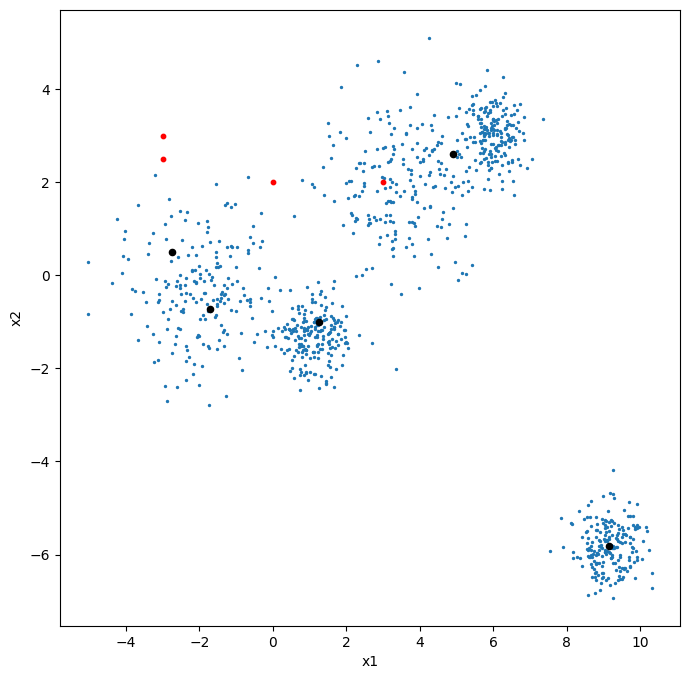

In [57]:
centroids = kmeans.cluster_centers_
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.scatter(centroids[:,0], centroids[:,1], c='k', s=20)
plt.scatter(X_new[:, 0], X_new[:,1], c='r', s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 5.1. Variante con centroides conocidos

Si se sabe aproximadamente dónde deberían estar los centroides, entonces puede inicializar `KMeans` con un parámetro llamado init que los contenga:

Entiendo, parece que tienes una matriz llamada good_init que contiene coordenadas para inicializar los centroides en un algoritmo de K-Means. Cada fila de esta matriz representa las coordenadas de un centroide en un espacio bidimensional.

Para calcular las distancias entre los puntos de datos y los centroides utilizando esta matriz good_init, podemos seguir un enfoque similar al que discutimos anteriormente. Aquí te muestro cómo calcular las distancias euclidianas utilizando esta matriz de inicialización de centroides:
import numpy as np

# Definir la matriz de puntos de datos (por ejemplo)
puntos_de_datos = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])

# Inicializar la matriz de centroides
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])

# Calcular las distancias euclidianas
distancias = np.linalg.norm(puntos_de_datos[:, None, :] - good_init, axis=2)

# Imprimir la matriz de distancias
for i, punto in enumerate(puntos_de_datos):
    print(f"Distancias para el punto de dato {i+1}: {distancias[i]}")
En este código, utilizamos np.linalg.norm() para calcular la norma euclidiana (distancia euclidiana) entre cada punto de datos y cada centroide en good_init. La función np.linalg.norm() nos permite calcular la norma a lo largo de un eje específico (en este caso, el eje 2 para calcular la norma de cada fila de la matriz resultante).

Por favor, házmelo saber si necesitas más ayuda o tienes alguna pregunta adicional.

In [59]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])

In [60]:
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [61]:
kmeans.fit_predict(X)

array([2, 0, 0, 2, 4, 4, 4, 4, 3, 4, 4, 0, 3, 0, 0, 4, 4, 4, 2, 4, 2, 4,
       2, 0, 4, 4, 3, 4, 3, 4, 1, 0, 3, 0, 0, 4, 4, 4, 0, 3, 4, 0, 1, 4,
       2, 4, 3, 0, 4, 4, 2, 3, 0, 3, 4, 2, 3, 3, 0, 4, 2, 3, 4, 4, 0, 3,
       2, 3, 4, 4, 4, 4, 0, 3, 4, 4, 0, 1, 3, 4, 0, 4, 4, 2, 1, 4, 3, 4,
       2, 2, 4, 3, 2, 4, 4, 1, 4, 4, 0, 0, 0, 0, 0, 2, 0, 2, 4, 3, 4, 4,
       3, 0, 0, 2, 0, 0, 4, 0, 0, 2, 3, 3, 4, 0, 4, 0, 0, 4, 3, 4, 1, 0,
       1, 3, 3, 4, 2, 3, 0, 2, 3, 4, 3, 0, 4, 3, 1, 3, 4, 3, 3, 4, 4, 2,
       2, 4, 0, 4, 3, 3, 4, 0, 4, 3, 0, 4, 0, 4, 3, 3, 4, 4, 3, 1, 4, 4,
       4, 4, 1, 2, 3, 0, 4, 2, 3, 4, 4, 3, 3, 4, 3, 2, 4, 0, 4, 3, 4, 3,
       2, 2, 3, 4, 0, 0, 2, 4, 1, 1, 2, 3, 0, 3, 1, 4, 4, 3, 3, 0, 2, 4,
       4, 0, 1, 2, 3, 4, 2, 0, 2, 4, 3, 0, 4, 4, 0, 4, 2, 0, 3, 3, 1, 0,
       4, 2, 3, 0, 4, 4, 4, 2, 3, 0, 4, 3, 4, 4, 4, 4, 0, 3, 1, 3, 0, 0,
       4, 4, 2, 0, 4, 4, 0, 3, 4, 4, 4, 0, 4, 3, 4, 4, 3, 3, 3, 0, 3, 3,
       3, 4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 2, 4, 4, 2,

Este array de números representa las asignaciones de cada punto de datos a un cluster específico después de aplicar el algoritmo de K-Means clustering. Cada número en el array corresponde a un punto de datos y representa a qué cluster pertenece ese punto.

Por ejemplo, si tienes un conjunto de datos con 200 puntos y has aplicado K-Means con K=5 (es decir, has generado 5 clusters), entonces este array tendrá 200 elementos. Cada elemento indicará a qué cluster pertenece el punto de datos correspondiente.

Para entenderlo mejor, podrías visualizar tus datos en un gráfico de dispersión (scatter plot) donde cada punto esté coloreado según el cluster al que pertenece, utilizando estos números como referencia. Esto te permitirá ver cómo se agrupan tus datos y cómo se distribuyen en diferentes clusters.

In [62]:
#plot_decision_regions(kmeans, X)

## 6. ¿Cómo encontrar el número óptimo de clústers?

### 6.1. Método del Elbow

Podríamos estar pensando que podemos elegir el modelo con la inertia más baja. Esto plantea un problema porque aumentar `k` siempre nos dará una menor inertia (o distorsión).

Visualicemos inertia como una función de `k`:

<div style="text-align:center">
    <img style="ancho:50%" src="img/k_to_inretia.png">
</div>

Como podemos ver, la distorsión (o inertia) cae mucho cuando pasamos de $3$ a $4$, pero luego disminuye mucho más lentamente y seguimos aumentando $k$. Esta curva tiene aproximadamente la forma de un brazo y hay un codo en $k=4$. Así que elegimos $4$.

Este método de elegir el número óptimo de clústeres es bastante basto.

Calculémoslo usando `sklearn`:


In [63]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto')
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

El código que has proporcionado se utiliza para calcular la suma de las distancias cuadradas de cada punto de datos al centroide de su cluster más cercano, también conocido como la inercia del modelo, para diferentes valores de K en el rango de 2 a 9.

Aquí hay una explicación paso a paso del código:

    Inicialización de la lista de distorsiones: Se crea una lista vacía llamada distortions para almacenar las distorsiones calculadas para cada valor de K.

    Bucle sobre diferentes valores de K: Se itera sobre el rango de valores de K de 2 a 9 utilizando la variable K.

    Creación del modelo K-Means: Para cada valor de K, se instancia un objeto de modelo KMeans con el número de clusters igual a K y se especifica n_init='auto' para permitir que el algoritmo K-Means seleccione automáticamente el número de intentos de inicialización.

    Ajuste del modelo: Se ajusta el modelo KMeans a los datos de entrada X utilizando el método fit().

    Cálculo de la inercia: Se obtiene la inercia del modelo utilizando el atributo inertia_, que representa la suma de las distancias cuadradas de los puntos de datos a los centroides de sus clusters más cercanos.

    Almacenamiento de la inercia: La inercia calculada se agrega a la lista distortions.

Después de ejecutar este código, la lista distortions contendrá las inercias calculadas para cada valor de K en el rango especificado. Esto te permitirá analizar la relación entre el número de clusters y la inercia del modelo para determinar el número óptimo de clusters para tus datos.


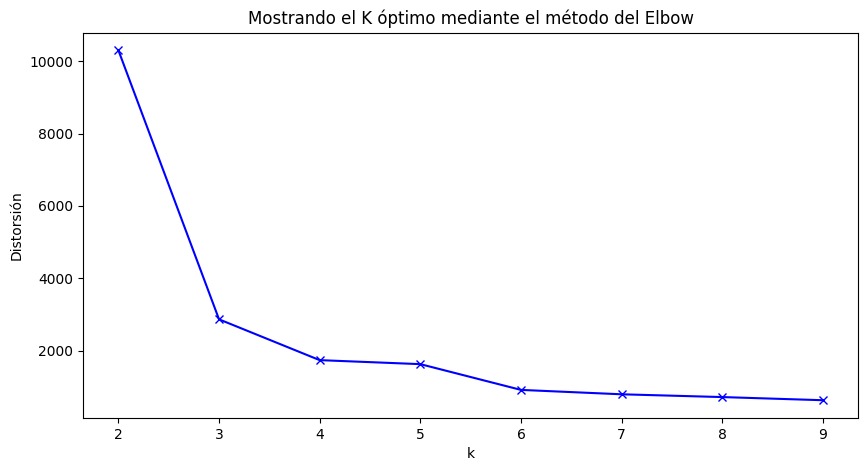

In [64]:
# Representa gráficamente la evolución de la distorsión en función de K
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Mostrando el K óptimo mediante el método del Elbow')
plt.show()

El código proporcionado se utiliza para graficar la evolución de la distorsión en función del número de clusters (K) utilizando el método del "Elbow" para identificar el número óptimo de clusters en un algoritmo de K-Means.

Aquí está la explicación paso a paso del código:

    Creación de la figura: Se crea una nueva figura de matplotlib con un tamaño de 10x5 utilizando plt.figure(figsize=(10,5)).

    Gráfico de la distorsión en función de K: Se utiliza plt.plot() para trazar la lista de valores de K en el eje x y la lista de distorsiones en el eje y. El argumento 'bx-' especifica el estilo de línea y marcador como puntos azules conectados por líneas.

    Etiquetado de los ejes: Se utiliza plt.xlabel() y plt.ylabel() para etiquetar los ejes x e y respectivamente. En este caso, el eje x está etiquetado como 'k' (número de clusters) y el eje y está etiquetado como 'Distorsión' (suma de las distancias cuadradas de los puntos de datos a los centroides de sus clusters más cercanos).

    Título del gráfico: Se utiliza plt.title() para agregar un título al gráfico, que en este caso es 'Mostrando el K óptimo mediante el método del Elbow'.

    Mostrar el gráfico: Finalmente, se utiliza plt.show() para mostrar el gráfico.

Este tipo de gráfico se utiliza para identificar el "codo" en la curva, que indica el número óptimo de clusters. El punto en el que la curva comienza a aplanarse o forma un codo pronunciado generalmente se considera el número óptimo de clusters. Este número representa un equilibrio entre la compacidad de los clusters (baja distorsión) y el número de clusters.

### 6.2. Silhouette Score

Un enfoque más preciso y costoso desde el punto de vista computacional es utilizar el Silhouette Score (o puntuación de silueta), que es el coeficiente de silueta medio de todas las instancias.

El Silhouette Score de una instancia es igual a $\frac{b-a}{max(a,b)} \in [-1,1]$
- $a$: distancia media a otras instancias del mismo clúster.
- $b$: distancia media a instancias en el siguiente clúster más cercano.
Resultado:
- $+1$ significa que la instancia está bien dentro de su propio clúster y lejos de otros clústeres.
- $0$ significa que la instancia se encuentra en el límite entre dos clústeres.
- $-1$ significa que la instancia puede estar en el clúster incorrecto.

El Silhouette Score mide una puntuación de **densidad** de clústeres.

In [65]:
from sklearn.metrics import silhouette_score

In [66]:
silhouette_score(X, kmeans.labels_, metric='euclidean')

0.584748119478902

El método silhouette_score se utiliza para calcular el coeficiente de silueta de un conjunto de muestras. El coeficiente de silueta es una medida de cuán similar es un objeto a su propio clúster (cohesión) en comparación con otros clústeres (separación). El valor del coeficiente de silueta varía entre -1 y 1, donde un valor alto indica que el objeto está bien emparejado con su propio clúster y mal emparejado con clústeres vecinos.

Aquí está la explicación de los parámetros utilizados en la función:

    X: El conjunto de datos para el que se calculará el coeficiente de silueta.
    kmeans.labels_: Las etiquetas de clúster asignadas por el algoritmo K-Means a cada muestra en el conjunto de datos.
    metric='euclidean': La métrica de distancia utilizada para calcular la similitud entre las muestras. En este caso, se utiliza la distancia euclidiana como métrica de distancia.

El coeficiente de silueta se calcula como la diferencia entre la distancia media intra-cluster y la distancia media al clúster más cercano para cada muestra, normalizada por el máximo de estas dos distancias. La función silhouette_score calcula el promedio del coeficiente de silueta para todas las muestras en el conjunto de datos.

En resumen, esta función evalúa la calidad de los clústeres generados por el algoritmo K-Means, proporcionando una medida de qué tan bien están separadas las muestras dentro de los clústeres y qué tan bien están separados los clústeres entre sí. Un valor más cercano a 1 indica una buena separación entre clústeres, mientras que un valor cercano a -1 indica que las muestras pueden haber sido asignadas incorrectamente a los clústeres.

Vamos a comparar el silhouette score para diferentes números de clústers:

In [69]:
scores = list()
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
    del(kmeans)

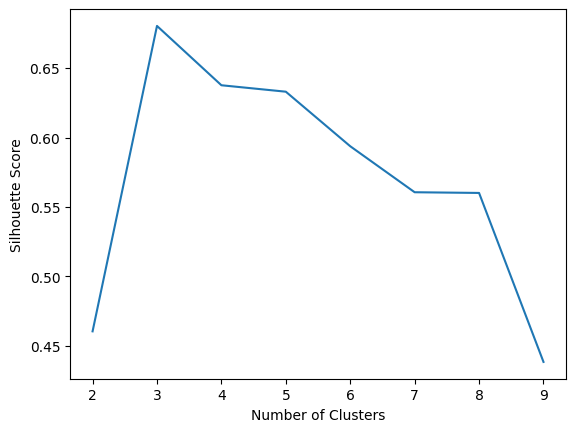

In [70]:
plt.plot(list(range(2, 10)), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Esta es una mejor visualización porque muestra la importancia de una pequeña cantidad de clústeres.

Se obtiene una visualización aún más informativa cuando trazamos el coeficiente de silueta de cada instancia, ordenados por el grupo al que están asignados y el valor del coeficiente. La línea discontinua indica el coeficiente de silueta medio:

<div style="text-align:center">
<img style="width:50%" src="imaxes/silhouette_diagram.png">
</div>

Cuando la mayoría de las instancias en un clúster tienen un coeficiente más bajo que esta puntuación, entonces el clúster es bastante malo, ya que esto significa que sus instancias están demasiado cerca de otros clústeres. En este ejemplo, `4` y `5` se ven bien y parece una buena idea usar $k=5$ para obtener grupos de tamaños similares.

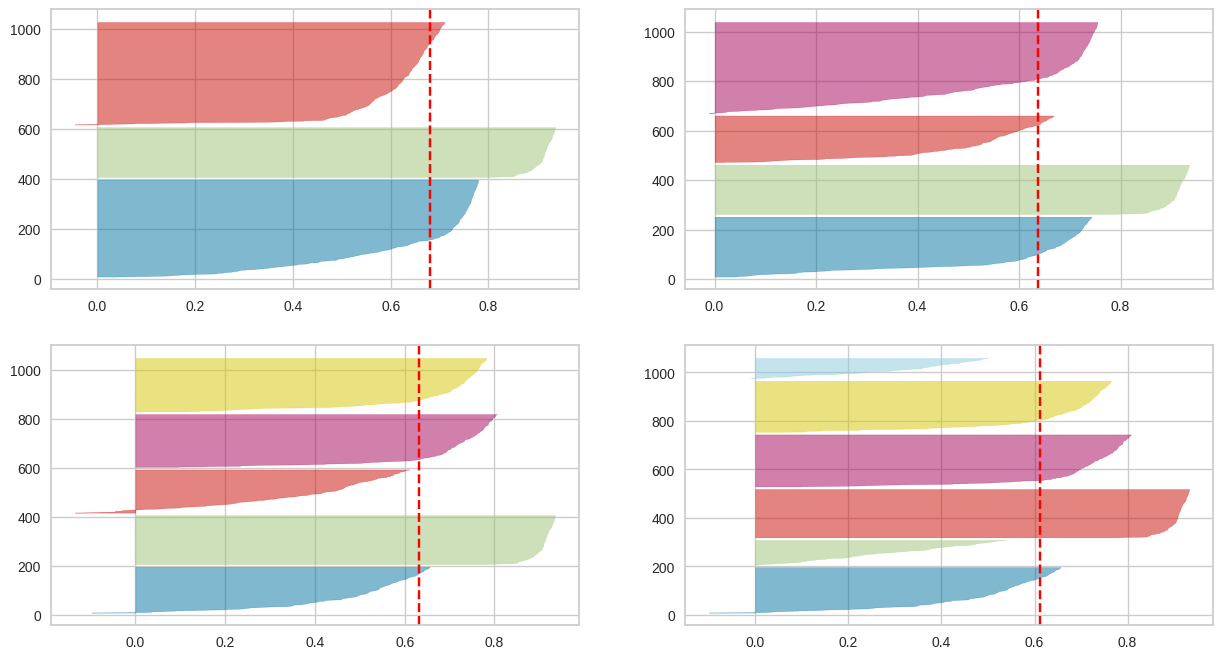

In [72]:
# from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
%matplotlib inline


# Generamos una vista de los distintos Silhouette score en función de K
# Genera un subplot por cada uno de los clústeres generados
# Genera scores para 3, 4, 5 y 6 Ks

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [3, 4, 5, 6]:
    # Creamos una instancia del modelo K-Means en función del valor de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-1, 2)
    # Creamos una instancia de "SilhouetteVisualizer" con la instancia KMeans anterior
    # Alimentamos el visualizador
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Este código utiliza la biblioteca Yellowbrick para visualizar los puntajes de silueta en función del número de clústeres (K). Aquí está la explicación paso a paso:

    Se importa la clase SilhouetteVisualizer de la biblioteca Yellowbrick, que se utiliza para visualizar los puntajes de silueta.
    Se importa matplotlib.pyplot para la visualización.
    Se inicializa una figura (fig) y ejes (ax) para contener los subgráficos.
    Se itera sobre una lista de valores [3, 4, 5, 6], que representa los números de clústeres (K) para los que se visualizarán los puntajes de silueta.
    Para cada valor de K en la lista, se crea una instancia de KMeans con el número de clústeres especificado por i.
    Se calculan los puntajes de silueta para los clústeres generados por el algoritmo K-Means utilizando la función fit() de SilhouetteVisualizer.
    Se crea una instancia de SilhouetteVisualizer con el modelo KMeans creado anteriormente y se alimenta con los datos X.
    Se utiliza divmod para calcular las posiciones de los subgráficos en la figura.
    Se especifica el color de los clústeres (colors='yellowbrick') y se pasa el eje correspondiente para cada visualizador.
    Finalmente, se llama al método fit() del visualizador para calcular y visualizar los puntajes de silueta para el número específico de clústeres (K).

## 7. Limites de K-means

- `K-means` no es perfecto, por lo que es necesario ejecutar el algoritmo varias veces para evitar soluciones subóptimas.

- Otro factor limitante del algoritmo es que necesitamos especificar el número de clústers.

- `K-means` tampoco se comporta muy bien cuando los grupos tienen diferentes tamaños, diferentes densidades o formas no esféricas.

- Dependiendo de los datos, diferentes algoritmos de clustering pueden funcionar mejor (como `DBSCAN` o `Gaussian Mixtures`).

- Escalar las entradas con un Standard Scaler también es imprescindible con `K-means`.


# Ejercicios

**1. ¿Cuáles son algunas de las principales aplicaciones de los algoritmos de clustering?**

Algunas de las principales aplicaciones de los algoritmos de clustering son:

    Segmentación de clientes: agrupar clientes con características similares para realizar estrategias de marketing específicas.

    
    Compresión de datos: reducir la dimensionalidad de los datos agrupando puntos similares en un único representante.

    
    Análisis de redes sociales: identificar comunidades de usuarios con intereses similares en redes sociales.

    
    Reconocimiento de patrones: encontrar grupos de datos similares en conjuntos de datos no etiquetados.

**2. Describe 2 técnicas para seleccionar el número correcto de clústeres al usar K-Means.**


Dos técnicas comunes para seleccionar el número correcto de clústeres al usar K-Means son:

    Método del codo (Elbow Method): Graficar la inercia (suma de las distancias al cuadrado de cada punto al centroide más cercano) en función del número de clústeres y seleccionar el punto donde la curva se aplane, formando un "codo".

    
    Puntuación de silueta (Silhouette Score): Calcular el promedio del coeficiente de silueta de todos los puntos y seleccionar el número de clústeres que maximice esta puntuación. El coeficiente de silueta mide qué tan similar es un punto a su propio clúster en comparación con otros clústeres.

**3. Abre el fichero ClusteringMetrics.ipynb y explica que otros dos métodos adicionales existen para seleccionar el número correcto de clústers. ¿En qué consisten? Busca información al respecto.**

Los otros dos métodos adicionales para seleccionar el número correcto de clústeres son:

    Método de la varianza explicada: Calcula la cantidad de varianza explicada como función del número de clústeres y selecciona el punto donde la varianza explicada deja de aumentar significativamente.


    
    Método de la distancia media: Calcula la distancia media entre puntos y centroides para diferentes números de clústeres y selecciona el número de clústeres que minimiza esta distancia media.

**4. Toma como base el dataset data_Clusters.csv y aplica un algoritmo de clustering a dicho dataset. Responde a las siguientes preguntas:
4.1. ¿Cuál es la media, max, min de cada característica?
4.2. ¿Cuál es la distribución espacial del dataset? Obtén una representación gráfica.
4.3. ¿Cuál es la evolución de la inertia en función de K? Obtén una representación gráfica.
4.4. ¿Cuál es el número óptimo de clusters que obtienes según el método del Elbow y el método del Silhouette Score?
4.5. Una vez obtenido el valor óptimo de K, genera un modelo K-means y entrénalo con los datos anteriores-
4.6. Invéntate diversas predicciones para saber en qué clúster se asigna.**

Para realizar estas tareas necesitarías proporcionar el archivo "ClusteringMetrics.ipynb" y el dataset "data_Clusters.csv", ya que requiere acceso a estos recursos para responder adecuadamente a las preguntas planteadas.

**5. ¿Qué otros algoritmos de clustering existen al margen del clásico K-means? Busca 2 y descríbelos.**

Además de K-means, otros algoritmos de clustering comunes incluyen:

    Clustering jerárquico: Agrupa los datos en una jerarquía de clústeres anidados, donde los clústeres se fusionan o dividen en función de la distancia entre ellos.
    DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Agrupa los puntos en función de la densidad de puntos en su vecindario, identificando clústeres como áreas de alta densidad separadas por áreas de baja densidad o ruido.

## 8. INFORMACIÓN EXTRA SOBRE CLUSTERING

### 8.1. Uso de Clustering para Preprocessing

El clustering puede ser una opción eficiente para la llevara cabo una reducción de la dimensionalidad. En particular, como un paso de as a preprocessing antes de un algoritmo de aprendizaje supervisado.

Vamos a mostrar un ejemplo de redución de la dimensionalidad usando clustering con el pequeño dataset digits (1797 imágenes de dígitos de 8x8 pixels):

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1347, 64), (1347,), (450, 64), (450,))

Visualizamos una imgen

<Figure size 432x288 with 0 Axes>

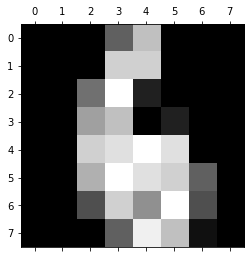

In [ ]:
plt.gray()
image = X_train[0].reshape(8,8)
plt.matshow(image)
plt.show()

Ahora, entrenamos un modelo de regresión logística:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
log_reg.score(X_test, y_test)

0.9511111111111111

Esta es nuestra accuracy de refereancia.

Vamos a crear un pipeline que agrupe en conjunto de entrenamiento en 50 clusters y **sustituya las imágenes por sus distancia a esos 50 clusters**, luego aplicaremos un modelo de regresión logística:

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline(steps=[
    ("kmeans", KMeans(n_clusters=50, n_init='auto')),
    ("log_reg", LogisticRegression(solver='liblinear', multi_class='auto'))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, n_init='auto')),
                ('log_reg', LogisticRegression(solver='liblinear'))])

In [ ]:
pipeline.score(X_test, y_test)

0.9755555555555555

Reduciendo la dimensionalidad de los datos de entrada, se consiguió eliminar gran parte del ruido y patrones presentes lo que facilita al Regresor Logístico la identificación de las instancias. En este caso hemos elegido el número de clusters de forma arbitraria, lo cual se podría mejorar.  

Podemos usar 'GridSearchCV' para encontrar el número óptimo de cluster en base al score final para la Regresión Logística:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Vamos a testear un rango para k de 75 a 124
param_dict = dict(kmeans__n_clusters=range(75,125))

In [ ]:
# Usamos validación cruzada con kfold=3
grid_clf = GridSearchCV(pipeline, param_dict, cv=3, verbose=2)

In [ ]:
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ..............................kmeans__n_clusters=75; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=75; total time=   0.5s
[CV] END ..............................kmeans__n_clusters=75; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=76; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=76; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=76; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=77; total time=   0.5s
[CV] END ..............................kmeans__n_clusters=77; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=77; total time=   0.5s
[CV] END ..............................kmeans__n_clusters=78; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=78; total time=   0.6s
[CV] END ..............................kmeans__

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, n_init='auto')),
                                       ('log_reg',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'kmeans__n_clusters': range(75, 125)}, verbose=2)

Obtenemos el valor de k con el que se ha obtenido el mejor resultado (en los datos no utilizados en el entrenamiento)

In [ ]:
grid_clf.best_params_

{'kmeans__n_clusters': 112}

In [ ]:
grid_clf.score(X_test, y_test)

0.9822222222222222

Para **`k=122`**, conseguimos aumentar la accuracy simplemente reduciendo la dimensionalidad del dataset usando clustering no supervisado antes de entrenar un regresor.

### 8.2. Accelerated `K-means` and `Mini-Batch K-means`

Una [mejora importante](https://www.aaaipress.org/Papers/ICML/2003/ICML03-022.pdf) del algoritmo `K-means` evita realizar muchos calculos de la distancia innecesarios lo cuál accelera el algoritmo. La tećnica se basa en la desigualdad del triangular: En todo triángulo, la suma de las longitudes de dos lados cualquiera es siempre mayor a la longitud del lado restante. El algoritmo mantiene un registro de los límites inferior y superior de las distancias entre las instancias y los centroides. Esta mejora también ha sido implementada en `sklearn`.

En otro [trabajo](http://www.ra.ethz.ch/CDstore/www2010/www/p1177.pdf) se propone el uso de mini-batches en lugar de usar todo el dataset para cada iteración. Con esto se consigue **acelerar** el algoritmo en un factor de 3 o 4 veces y permite llevar a cabo el clustering de grandes dataset que no se pueden mantener en memoria.

Vamos a usar en `sklearn`:

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init='auto')

In [ ]:
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init='auto')

Si nuestro dataset no se puede almacenar en memoria, podemos usar `memmap`con el método `partial_fit()'.

La ventaja de usar 'MiniBatchMeans' es considerable cuando elegimos un valor grande de `k` para los clusters. El método Bacthing llega a ser mucho más rápido y el rendimiento se mantiene aproximadamente igual:

<div style="text-align:center">
    <img style="width:50%" src="imaxes/inretia_speed.png">
</div>

# Webgrafia


[Curso de Akramz basado en Aurelien Geron](https://github.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow)
[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
Curso de la Xunta de Galicia impartido por Alfonso Antolínez
[DataCamp](https://www.datacamp.com/)

# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.